In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/neo-stark-team/Datasets/main/Mall_Customers.csv")
df.columns=["cus_id","Gender","Age","Income","score"]
df

,cus_id,Gender,Age,Income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().sum()

cus_id    0
Gender    0
Age       0
Income    0
score     0
dtype: int64

In [ ]:
df.describe()

,cus_id,Age,Income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df_cor=df.corr()
df_cor

<ipython-input-6-34ba205ecfef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor=df.corr()


,cus_id,Age,Income,score
cus_id,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Income,0.977548,-0.012398,1.000000,0.009903
score,0.013835,-0.327227,0.009903,1.000000


In [ ]:
Q3=df["Income"].quantile(.75)
Q1=df["Income"].quantile(.25)
Q3
#Q1#(41.5)

78.0

In [ ]:
IQR=Q3-Q1
IQR

36.5

In [ ]:
U1=Q3+1.5*IQR
U1
L1=Q1-1.5*IQR
L1

-13.25

In [ ]:
outliers=df[~((df["Income"]<L1)|(df["Income"]>U1))]
outliers

,cus_id,Gender,Age,Income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [ ]:
outliers.isnull().sum()

cus_id    0
Gender    0
Age       0
Income    0
score     0
dtype: int64

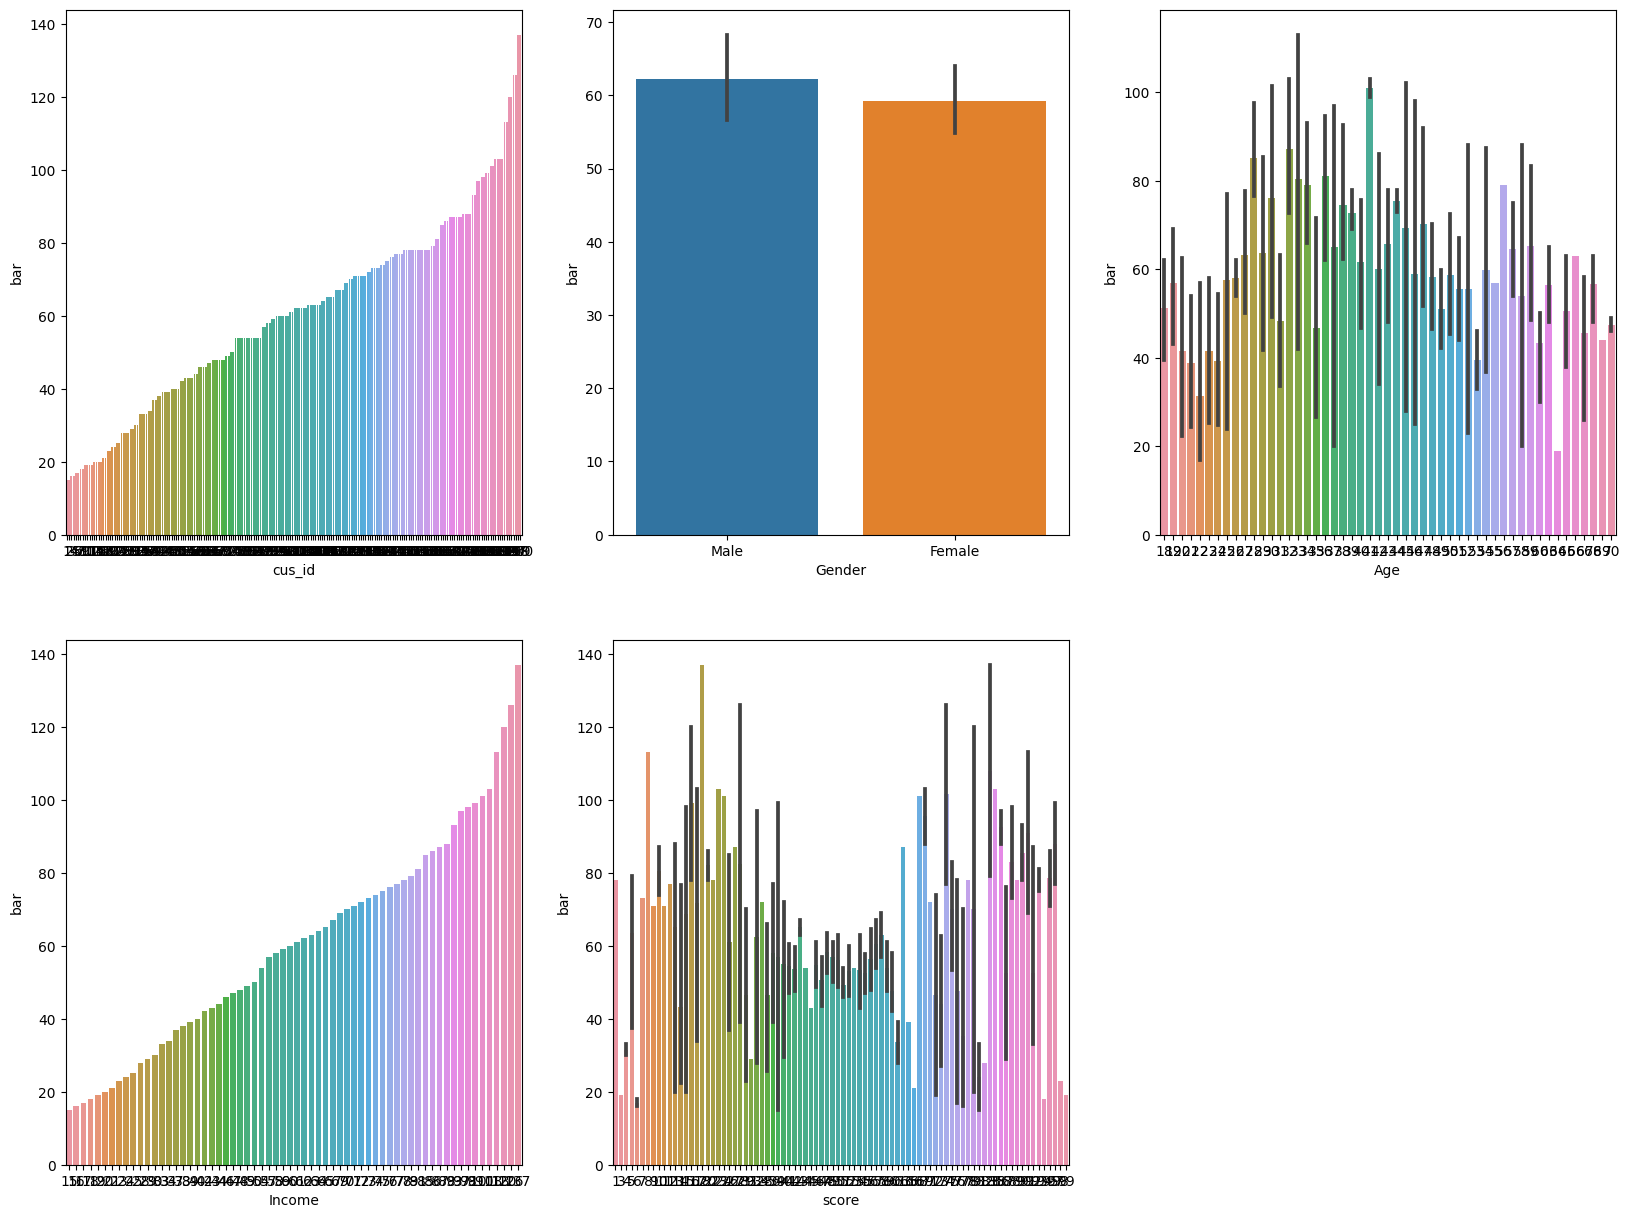

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
x=df.iloc[-1:1]

fig=plt.figure(figsize=(20,15))

for i,col in enumerate(x,1):
 plt.subplot(2,3,i)
 sns.barplot(data=df,x=col,y=df["Income"])
 plt.xlabel(col)
 plt.ylabel('bar')
fig.show()


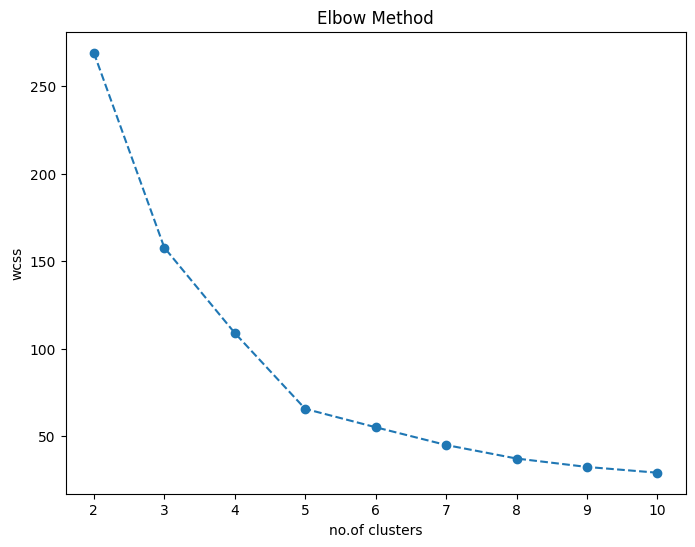

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=df[["Income","score"]]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=200,n_init=10,random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(2,11), wcss, marker="o",linestyle="--")
plt.title("Elbow Method")
plt.xlabel("no.of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=200,n_init=10,random_state=0)
kmeans.fit(X_scaled)

df["cluster"]=kmeans.labels_
df

,cus_id,Gender,Age,Income,score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [ ]:
from sklearn.metrics import silhouette_score

sil_avg=silhouette_score(X,kmeans.labels_)
sil_avg

0.553931997444648

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage="ward")
model.fit(X)
labels=model.labels_
df["cluster"]=labels
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,cus_id,Gender,Age,Income,score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
sil_avg1=silhouette_score(X,model.labels_)
sil_avg1

0.5529945955148897

In [ ]:
import pandas as pd
df1=pd.read_excel("/content/Copy of cust_data.xlsx")
df1

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
df1.dropna()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
corr=df1.corr()
corr

<ipython-input-32-40073d4114d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df1.corr()


,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,1.000000,0.029132,0.064277,0.021821,0.057206,0.049191,0.060677,0.035560,0.043043,0.002158,...,0.029693,0.062489,0.057356,0.016463,0.084793,0.049231,0.002061,-0.005614,-0.019145,0.022508
Orders,0.029132,1.000000,0.016090,0.034310,0.017885,0.015584,0.009018,0.008741,0.003856,0.006343,...,-0.006382,0.009027,0.020050,0.003550,0.001680,-0.003436,0.007455,0.015307,0.011268,-0.007160
Jordan,0.064277,0.016090,1.000000,0.177254,0.071258,0.123731,0.135673,0.021950,0.040710,0.115796,...,0.070205,0.061185,0.062582,0.063739,0.026350,0.024710,0.015564,0.015804,0.021651,0.018918
Gatorade,0.021821,0.034310,0.177254,1.000000,0.063890,0.046215,0.058180,0.031272,0.088166,0.170620,...,0.066443,0.056571,0.045958,0.058190,0.050302,0.031495,0.018279,0.016625,0.038655,0.018553
Samsung,0.057206,0.017885,0.071258,0.063890,1.000000,0.012274,0.028785,0.035807,0.014565,0.029155,...,0.058584,0.017369,0.046561,0.015502,0.021566,0.016170,0.005584,0.003640,0.009303,0.006633
Asus,0.049191,0.015584,0.123731,0.046215,0.012274,1.000000,0.114588,0.018120,0.026668,0.046990,...,0.025722,0.028911,0.043168,0.039139,0.017283,0.014186,0.009605,0.019748,0.008001,0.007530
Udis,0.060677,0.009018,0.135673,0.058180,0.028785,0.114588,1.000000,0.040251,0.023128,0.020696,...,0.030406,0.029567,0.068091,0.023367,0.032484,0.035360,0.000437,0.012679,0.004808,0.006795
Mondelez International,0.035560,0.008741,0.021950,0.031272,0.035807,0.018120,0.040251,1.000000,0.021211,0.020795,...,0.036895,0.034783,0.100657,0.056306,0.036270,0.044912,0.014344,0.013070,0.025066,0.019727
Wrangler,0.043043,0.003856,0.040710,0.088166,0.014565,0.026668,0.023128,0.021211,1.000000,0.028595,...,0.079583,0.054262,0.099995,0.045565,0.075141,0.066978,0.006188,0.008203,0.015954,0.014749
Vans,0.002158,0.006343,0.115796,0.170620,0.029155,0.046990,0.020696,0.020795,0.028595,1.000000,...,0.073194,0.014776,-0.011961,0.021992,0.007039,0.002500,0.000045,-0.002454,0.008639,0.013326


In [ ]:
df1.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

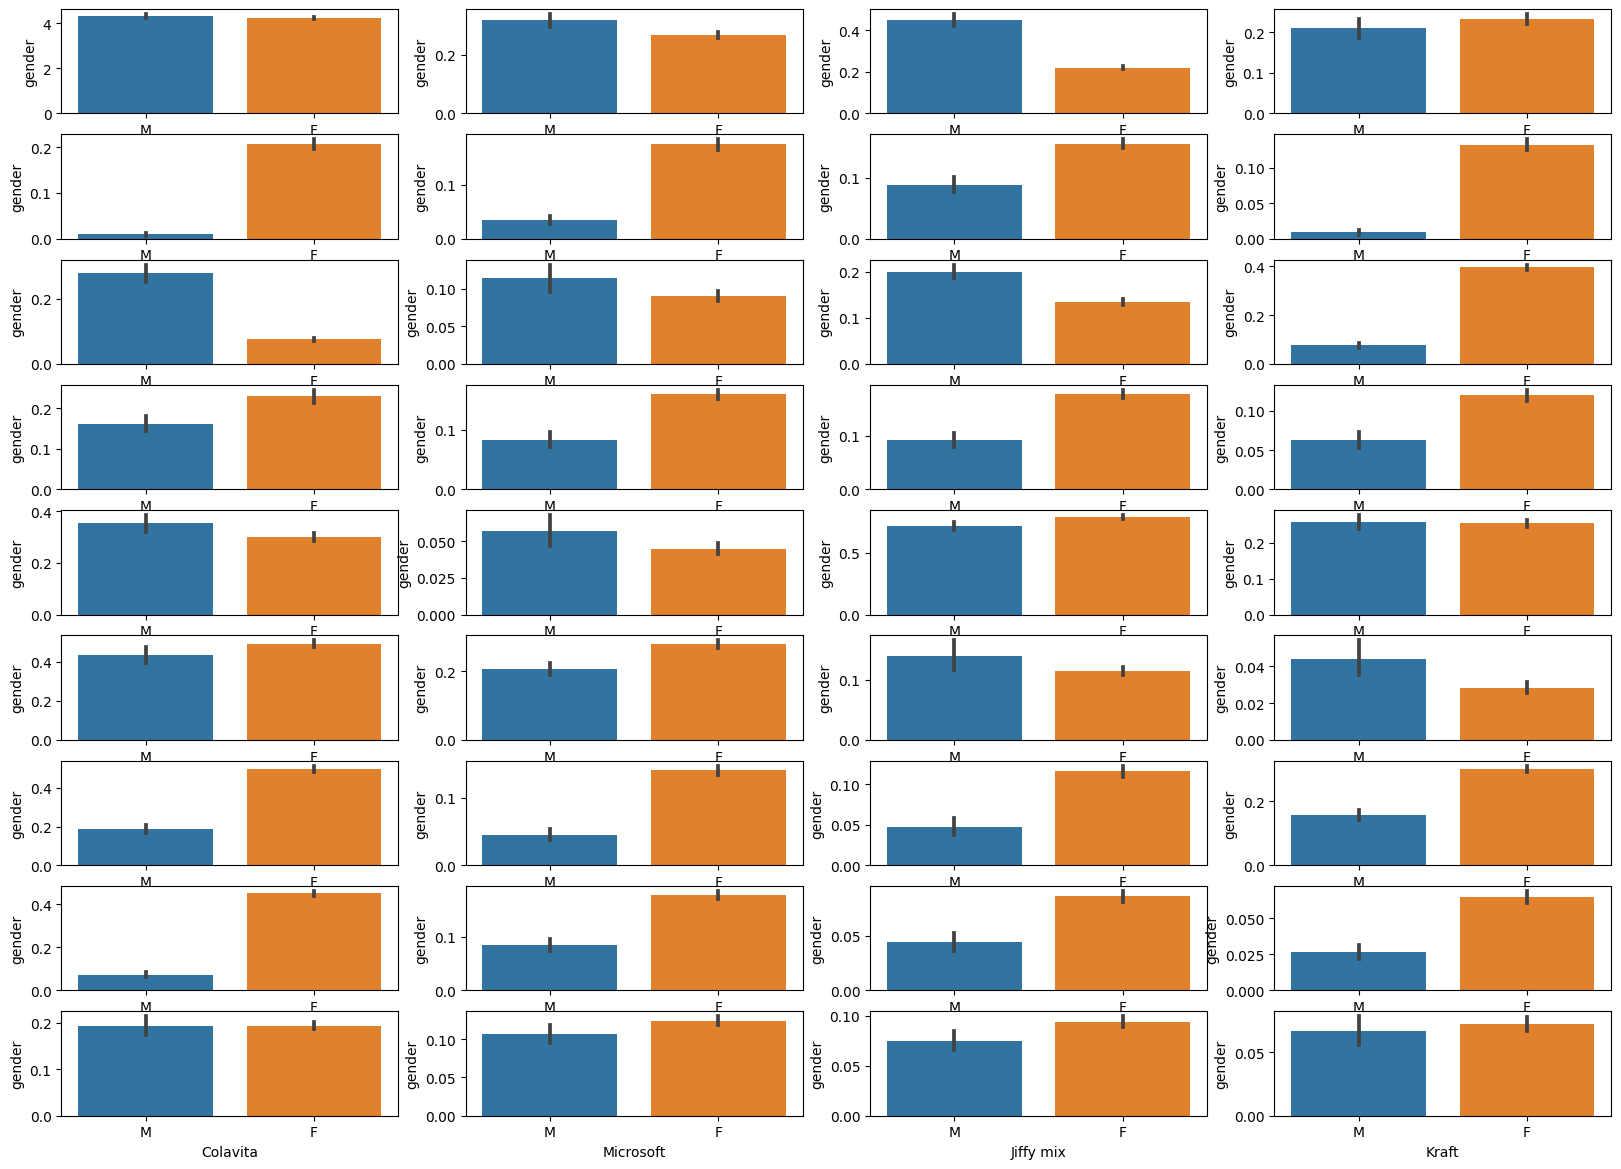

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X=df1['Gender','Orders',]
Y=df1.drop(['Gender','Cust_ID'],axis=1)
plt.figure(figsize=(20,16))
for i,col in enumerate(Y,1):
 plt.subplot(10,4,i)
 sns.barplot(data=df1,x=X,y=col)
 plt.xlabel(col)
 plt.ylabel('gender')
plt.show()

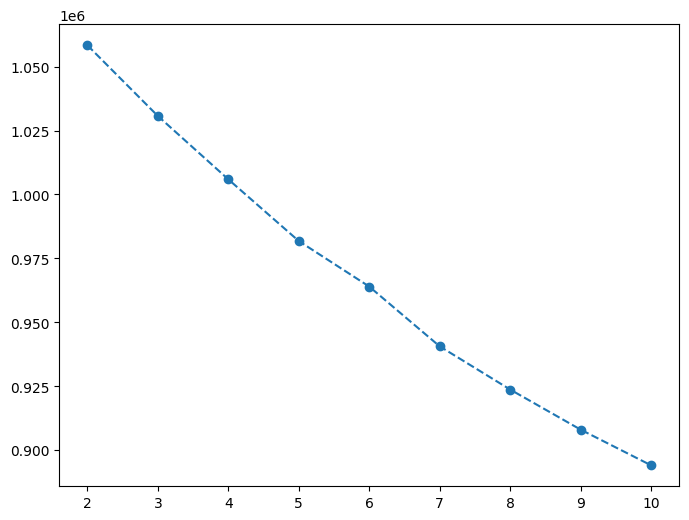

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

x=df1.drop("Gender",axis=1)

scaler=StandardScaler()

X_scaled=scaler.fit_transform(x)

wcss=[]
for i in range (2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,6))
plt.plot(range(2,11),wcss,marker='o',linestyle='--')
plt.show()

In [ ]:
x=df1.drop("Gender",axis=1)

scaler=StandardScaler()

X_scaled=scaler.fit_transform(x)

wcss=[]
for i in range (2,11):
  kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)


In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=200,n_init=10,random_state=0)
kmeans.fit(X_scaled)

df1["cluster"]=kmeans.labels_
df1

#another

for i in range(2,11):
  clus_data=df1[df1["cluster"]==i]
  print(f"clus_no{i}:\n{clus_data}\n")

clus_no2:
       Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
51          52      M      10       0         0        0     0     0   
56          57      F       8       1         0        0     0     0   
113        114      F       8       2         0        0     0     0   
140        141      M       4       0         3        0     0     0   
141        142      F       3       0         0        0     0     0   
...        ...    ...     ...     ...       ...      ...   ...   ...   
29550    29551      F       0       0         0        0     0     0   
29633    29634      F       0       0         0        0     0     2   
29701    29702    NaN       4       0         0        0     1     0   
29748    29749      M       7       0         0        0     0     0   
29811    29812      F       5       1         0        0     0     0   

       Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
51                          0         0  ...   

In [ ]:
from sklearn.metrics import silhouette_score

sil_avg=silhouette_score(x,kmeans.labels_)
sil_avg

-0.21680665519453213

In [ ]:
sil_score=[]
for k in range(2,11):

  kmeans=KMeans(n_clusters=k,random_state=0)
  kmeans.fit(X_scaled)
  labels=kmeans.predict(X_scaled)
  sil_score.append(silhouette_score(X_scaled,labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

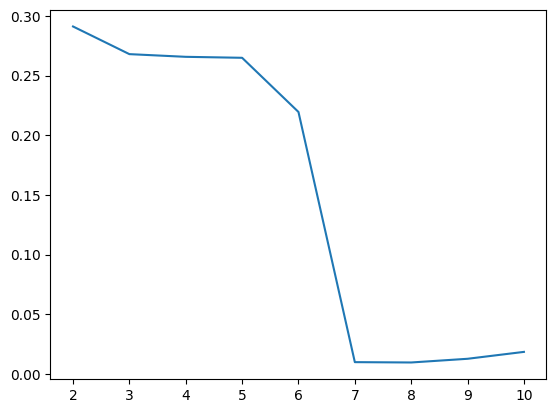

In [ ]:
plt.plot(range(2,11),sil_score)
plt.show()